# WeatherPy
----

## Observations and Insights
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
city_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pd.set_option("max_columns", len(city_df.columns))
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
responses = [];
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
            
# Print the city count to confirm sufficient count
city_count = len(cities)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sistranda"
query_url = url + "appid=" + api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 8.83, 'lat': 63.73},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 275,
  'feels_like': 265.61,
  'temp_min': 274.15,
  'temp_max': 275.93,
  'pressure': 999,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 9.8, 'deg': 140},
 'clouds': {'all': 99},
 'dt': 1584229601,
 'sys': {'type': 1,
  'id': 1647,
  'country': 'NO',
  'sunrise': 1584250918,
  'sunset': 1584293109},
 'timezone': 3600,
 'id': 3139597,
 'name': 'Sistranda',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
# query_url = f"{url}appid={api_key}&q="
query_url = url + "appid=" + api_key + "&q="
# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humidity = []
wind = []
clouds = []
dt = []
country = []
final_city = []
# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities[:605]):
    try:
        response=requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        final_city.append(city)
        print(f"city number is {index} {city}")
    except:
        print("city not found")

city number is 0 tiksi
city number is 1 saskylakh
city number is 2 christchurch
city number is 3 neckarsulm
city number is 4 haradok
city number is 5 cape town
city number is 6 chokurdakh
city number is 7 port alfred
city number is 8 port elizabeth
city number is 9 caernarfon
city number is 10 mahebourg
city number is 11 havelock
city number is 12 vaini
city number is 13 shingu
city number is 14 constitucion
city number is 15 sao filipe
city number is 16 pillaro
city number is 17 airai
city number is 18 anadyr
city number is 19 arraial do cabo
city number is 20 clyde
city number is 21 bluff
city number is 22 husavik
city number is 23 carnarvon
city number is 24 fairbanks
city number is 25 busselton
city number is 26 tilichiki
city number is 27 bredasdorp
city number is 28 puerto ayora
city number is 29 yinchuan
city number is 30 yellowknife
city number is 31 bjornevatn
city number is 32 cayenne
city number is 33 bataipora
city number is 34 mataura
city number is 35 abha
city number is 

city number is 602 berberati
city number is 603 waipawa
city number is 604 pak chong


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# # Write DataFrame to CSV
city_df.to_csv("city_data.csv", encoding="utf-8", index=False)
city_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [7]:
city_data =pd.DataFrame({
   "City":final_city,"Cloudiness":clouds,
   "Country":country,"Date":dt,
   "Humidity":humidity,"Lat":lat,
   "Lng":lng,"Max Temp":temp_max,
    "Wind Speed":wind
}) 
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tiksi,14,RU,1584229601,71,71.69,128.87,247.27,2.93
1,saskylakh,97,RU,1584229094,95,71.92,114.08,256.68,5.00
2,christchurch,92,NZ,1584229367,72,-43.53,172.63,292.04,6.20
3,neckarsulm,7,DE,1584229602,83,49.19,9.23,278.71,1.00
4,haradok,57,BY,1584229602,68,55.46,29.98,268.23,5.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

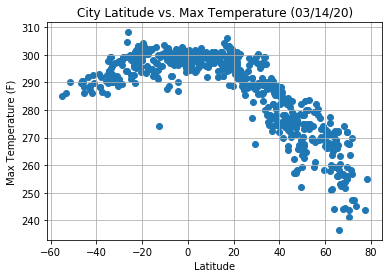

Temperature is inversely realted to Latitude, as latitude increases, the temperature falls


In [8]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker ='o')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x") ) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/tempinworld.png")
plt.show()
print(f'Temperature is inversely realted to Latitude, as latitude increases, the temperature falls')

#### Latitude vs. Humidity Plot

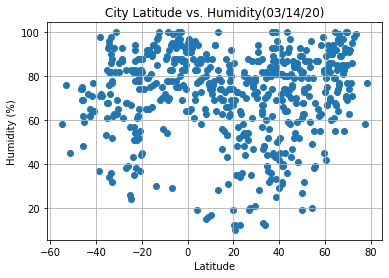

There is no relationship between temperature and humidity


In [9]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker ='o')
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/humidityinworld.png")
plt.show()
print(f'There is no relationship between temperature and humidity')

#### Latitude vs. Cloudiness Plot

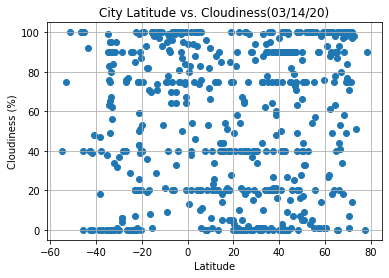

 Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.


In [10]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker ='o')
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/cloudinessinworld.png")
plt.show()
print(f' Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest \
around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.')
# Reference: http://www-das.uwyo.edu/~geerts/cwx/notes/chap08/cloud_lat.html

#### Latitude vs. Wind Speed Plot

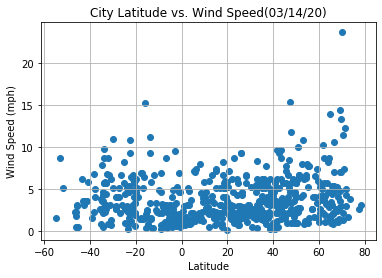

 There is no relationship between windspeed and latitude.


In [11]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker ='o')
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../output_data/windspeedinworld.png")
plt.show()
print(f' There is no relationship between windspeed and latitude.')

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots
def plot_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # with using the point, the lineregress will not appear for all the regressions,\
    # so I drew each of them separately.
    plt.annotate(line_eq,(0,10),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
city_df_nh = city_data.loc[city_data["Lat"] >= 0] #len(city_df_nh)=380
city_df_sh = city_data.loc[city_data["Lat"] < 0] #len(city_df_sh)=168

The r-squared is: -0.8911619285780742


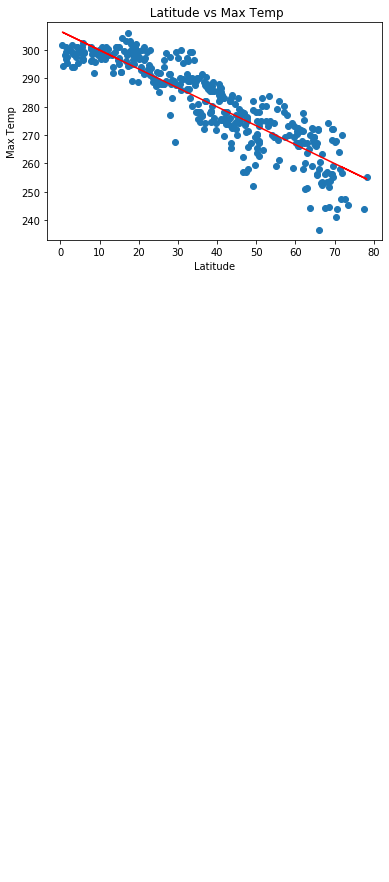

The r-squared is: 0.16966744358880512


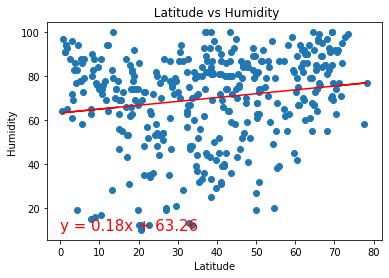

The r-squared is: 0.22187919024800756


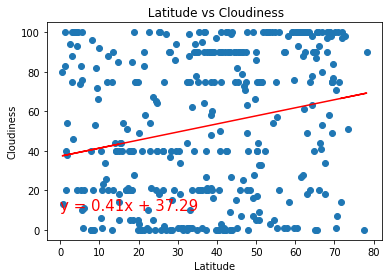

The r-squared is: 0.24895037218343682


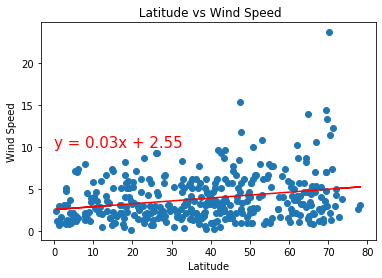

<Figure size 432x288 with 0 Axes>

In [14]:
#Northern Hemisphere Regression Lines
var_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
counter=0
for variables in var_list:
    x_values = city_df_nh["Lat"]
    y_values = city_df_nh[var_list[counter]] #0 is associated with "Max Temp",1 is associated with"Humidity" and so on!
    plt.title(f" Latitude vs %s" % var_list[counter])
    plot_regression (x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(var_list[counter])
    plt.savefig("../Images/var_list[counter].png")
    plt.show()
    plt.clf()
    counter= counter + 1
    if counter ==4:
        break

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8911619285780742


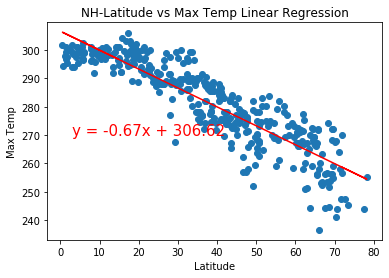

In [18]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("NH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,270),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5252444413188785


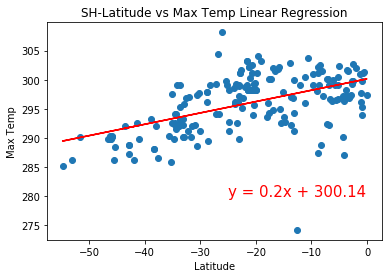

In [19]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("SH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,280),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16966744358880512


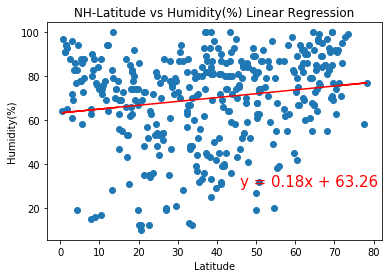

In [20]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("NH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33892311120653995


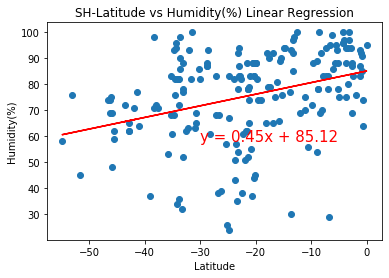

In [21]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("SH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,58),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22187919024800756


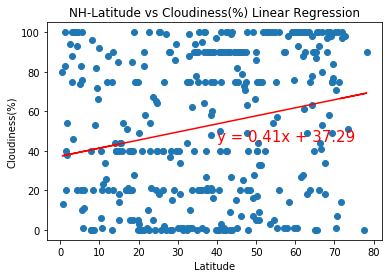

In [22]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("NH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2879041335121775


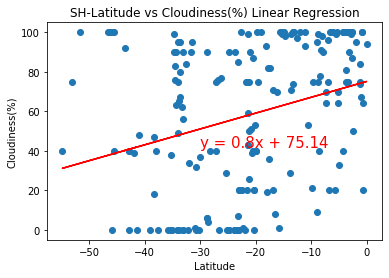

In [23]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("SH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,42),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24895037218343682


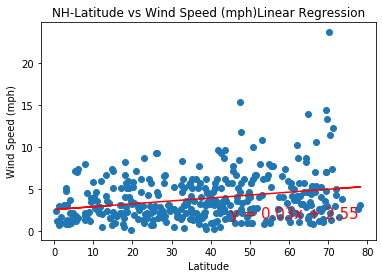

In [24]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("NH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,1.5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15196628728360495


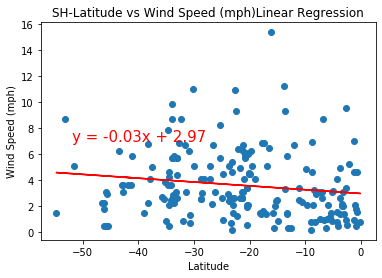

In [25]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("SH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,7),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()